# Getting Started

## Installation and testing

### Register AxisVM's Type Library

If this is not your first time using **AxisVM** through a COM interface on your machine, you should already have a registered type library and you can skip this step. Otherwise, follow the instructions at the beginning of the ***AxisVM API Reference Guide***.


### Install PyAxisVM
This is optional, but we suggest you to create a dedicated virtual enviroment at all times to avoid conflicts with your other projects. Create a folder, open a command shell in that folder and use the following command

```console
>>> python -m venv venv_name
```

Once the enviroment is created, activate it via typing

```console
>>> .\venv_name\Scripts\activate
```

The **AxisVM** python package can be installed (either in a virtual enviroment or globally) from PyPI using `pip` on Python >= 3.6:

```console
>>> pip install axisvm
```

### Launch AxisVM from Python

The `axisvm.com.client` submodule implements various tools to handle the client side operations of creating a COM connection. Import the module and start a new application instance with the `start_AxisVM` method:


```python
from axisvm.com.client import start_AxisVM
axapp = start_AxisVM(visible=True)
```

To test the connection, you can query the path of the executable being run by typing `axapp.FullExePath`.

## How to use the API

`pyaxisvm` has two layers. The first one is the raw type library extracted from AxisVM using the `comptypes` package. We are working on an online version of it, until that the documentation of this layer is only available in pdf format, that you should already posess at the moment of reading this notebook. If you don't have it yet, go to our website, and look for it under downloads. Be careful to download the documentation that matches the version of your AxisVM instance.

### Basic API usage

Firts of all, we need a runnning AxisVM either in the background, or with the graphical interface.

In [15]:
from axisvm.com.client import start_AxisVM
axvm = start_AxisVM(visible=True, daemon=True)

As a consequence of the hierarchical structure of the models in AxisVM, every model creation proccess starts with nodes. To create nodes we need an interface to the nodes of the application. This is achieved by the `IAxisVMNodes` class of the type library. If you look it up in the pdf document, you will see this:

![IAxisVMNodes](IAxisVMNodes.png)

Just like other interfaces, the documentation of `IAxisVMNodes` begins with listing the enumerations and records specific to nodes. Below these, you can see the functions of the interface.

![Functions](IAxisVMNodes_Functions.png)

After all the functions, the documentation of the interface is finished by listing the properties of the interface.

![Properties](IAxisVMNodes_Properties.png)

In [16]:
from axisvm.com.client import start_AxisVM
axvm = start_AxisVM(visible=True, daemon=True)

modelId = axvm.Models.New()
model = axvm.Models[modelId]

Right below the `Add` function, there is the `AddWithDOF`, with the following documentation:

![Properties](IAxisVMNodes_AddWithDof.png)

It tells, that the function needs to be called with specifying three scalar values and a fourth one specifying a DOF component. The enumeration `EDegreeOfFreedom` was listed at the beginning of the documentation of the interface.

In [17]:
from axisvm.com.tlb import dofFree
id1 = model.Nodes.AddWithDOF(-1, -1, 0, dofFree)
id2 = model.Nodes.AddWithDOF(1, -1, 0, dofFree)
id3 = model.Nodes.AddWithDOF(1, 1, 0, dofFree)
id4 = model.Nodes.AddWithDOF(-1, 1, 0, dofFree)

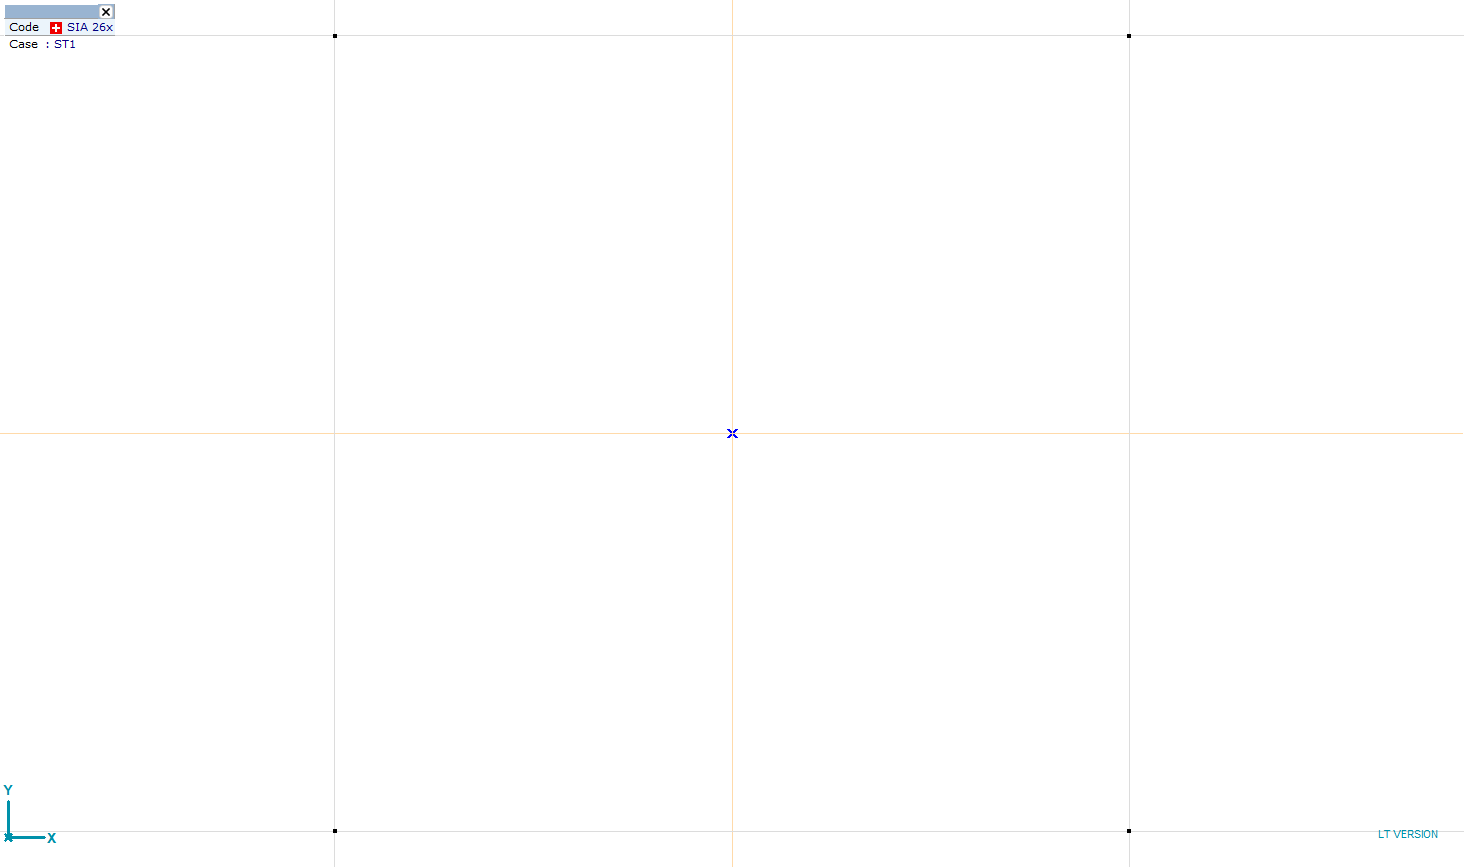

In [18]:
axvm.BringToFront()
model.FitInView()
model.Windows[1].screenshot()

After the session has ended, close the application by

In [19]:
axvm.Quit()